# Q1

In [43]:
import random as aleas  # pour generer des nombres aleatoires et +
import matplotlib.pyplot as plt # pour les graphiques
from scipy.signal import freqz   # pour avoir le TF de l'autocorrelation
import numpy as np #pour gerer les moyennes + covariances +++

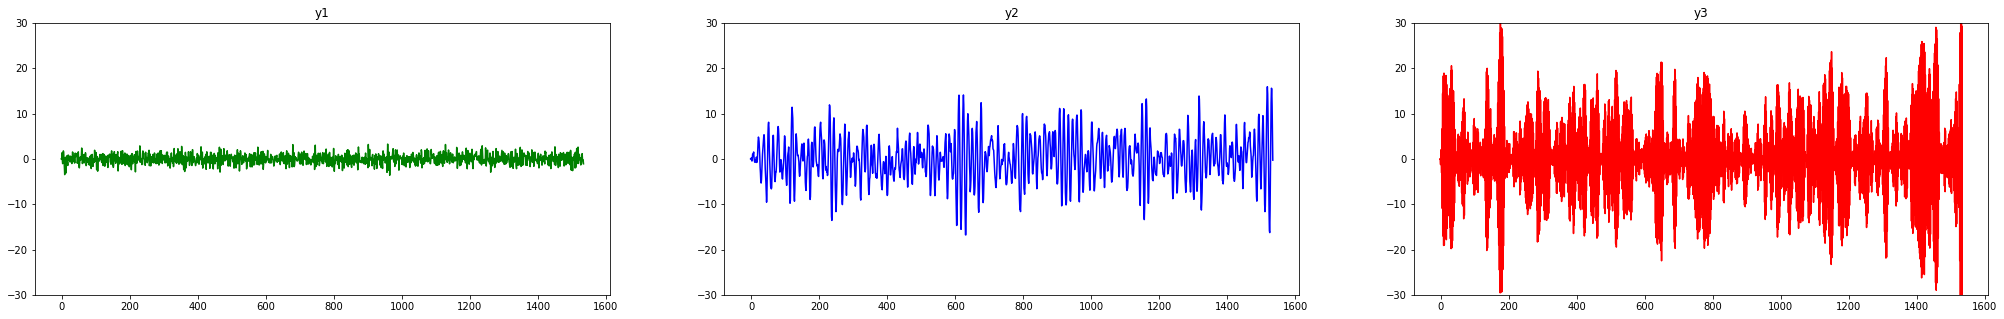

In [63]:
n=1536 #  nombre de donnees a genener
#% Sequences des parametres des 3 modeles AR du second ordre
a = [1,-0.0707,0.2500] # coefficients du premier processus AR
b = [1,-1.6674,0.9025] # Ccoefficients du second processus AR
c = [1,1.7820,0.8100]  # coefficients du troisieme processus AR

t=range(-2,n-1)
y1 = [k*0 for k in t]
y2 = [k*0 for k in t]
y3 = [k*0 for k in t]

for k in range(1,n):
    y1[k+1] = -a[1]*y1[k] - a[2]*y1[k-1] + aleas.gauss(0,1)
    y2[k+1]= -b[1]*y2[k] - b[2]*y2[k-1] + aleas.gauss(0,1)
    y3[k+1]= -c[1]*y3[k] - c[2]*y3[k-1] + aleas.gauss(0,1)


plt.figure(figsize=(35,5))
ax0 = plt.subplot(131)
ax0.set_ylim(-30,30)
ax0 = plt.plot(t,y1,"g")
ax0 = plt.title("y1")
ax1 = plt.subplot(132)
ax1.set_ylim(-30,30)
ax1 = plt.plot(t,y2,"b")
ax1 = plt.title("y2")
ax2 = plt.subplot(133)
ax2.set_ylim(-30,30)
ax2 = plt.plot(t,y3,"r")
ax2 = plt.title("y3")


Modèle stationnaire d'ordre 2 : globalement stationnaire dans le cas ou on regarde l'ensemble des séries

Visualisation des séries

# Q2


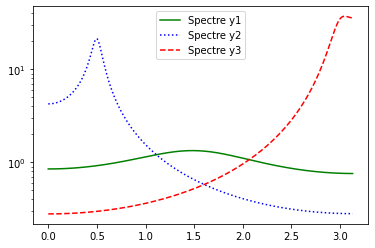

Text(0.5, 1.0, "Fonction d'autocorrélation de y3")

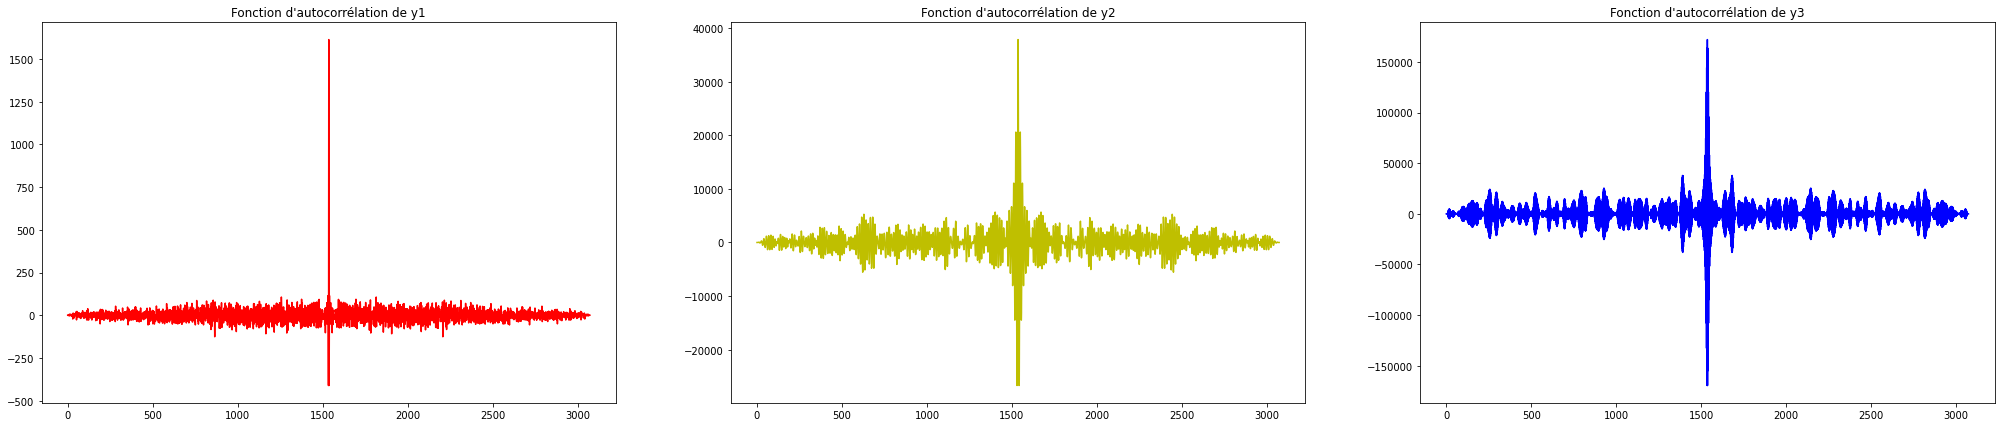

In [78]:

def spectre(*args): 
	Np = 256 # nombre de points du spectre
	f=freqz(1,args[0],Np)[0] # recuperer les echantillons de frequences (abscisses)
	mag=[]   # hauteurs des frequences observables correspondantes (ordonnees)
	for arg in args:
		mag.append(abs(freqz(1,arg,Np)[1])) # calcul du spectre de chaque sous-serie
	return (f,mag)

f,mag=spectre(a,b,c)
## Calcul des spectres des trois sous-series 
plt.semilogy(
	f,mag[0],'-g',
	f,mag[1],':b',
	f,mag[2],'--r'
)
## Traces des spectres des trois sous-series 
plt.legend(['Spectre y1','Spectre y2','Spectre y3'])
plt.show()

plt.figure(figsize=(35,7))
plt.subplot(131)
plt.plot(np.correlate(y1,y1,'full'), 'r')
plt.title("Fonction d'autocorrélation de y1")
plt.subplot(132)
plt.plot(np.correlate(y2,y2,'full'), 'y')
plt.title("Fonction d'autocorrélation de y2")
plt.subplot(133)
plt.plot(np.correlate(y3,y3,'full'), 'b')
plt.title("Fonction d'autocorrélation de y3")

# Q3

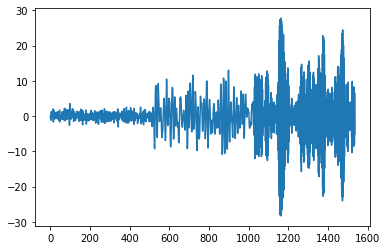

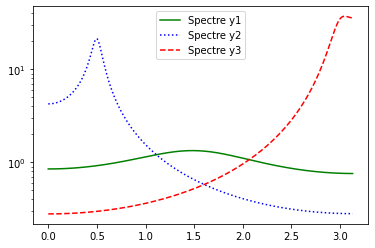

Text(0.5, 1.0, "Fonction d'autocorrélation de y1")

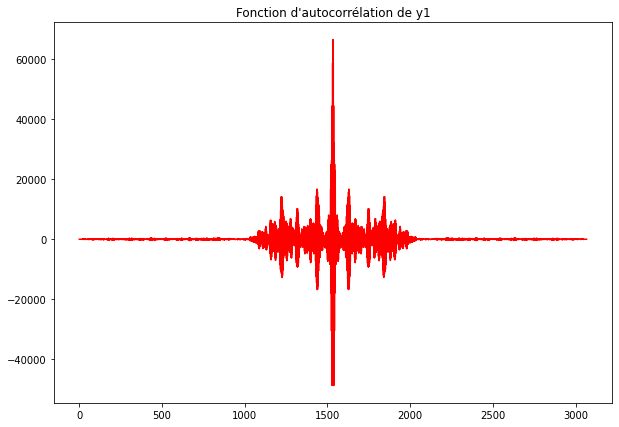

In [84]:
n=1536 #  nombre de donnees a genener
#% Sequences des parametres des 3 modeles AR du second ordre
a=[
    [1,-0.0707,0.2500], # coefficients du premier processus AR
    [1,-1.6674,0.9025], # Ccoefficients du second processus AR
    [1, 1.7820,0.8100]  # coefficients du troisieme processus AR
]

####################################################################
## Generer une serie temporelle (non-stationnaire globalement)
##    composee de 3 blocs stationnaires
####################################################################
####################################################################
## Generation et juxtaposition des 3 blocs de largeur n/3 chacun
t=range(-2,n-1)
y=[k*0 for k in t]
for k in range(1,int(n/3)):
    y[k+1]=-a[0][1]*y[k]-a[0][2]*y[k-1]+aleas.gauss(0,1)
for k in range(int(n/3)+1,2*int(n/3)):
    y[k+1]=-a[1][1]*y[k]-a[1][2]*y[k-1]+aleas.gauss(0,1)
for k in range(2*int(n/3)+1,n):
    y[k+1]=-a[2][1]*y[k]-a[2][2]*y[k-1]+aleas.gauss(0,1)

y=y[3:]  # suppression des donnees transitoires
t=t[3:]
# Trace- de la serie
plt.plot(t,y,label='Data = juxtapososition de 3 sous-series stationnaires')
plt.show()

def spectre(*args): 
	Np = 256 # nombre de points du spectre
	f=freqz(1,args[0],Np)[0] # recuperer les echantillons de frequences (abscisses)
	mag=[]   # hauteurs des frequences observables correspondantes (ordonnees)
	for arg in args:
		mag.append(abs(freqz(1,arg,Np)[1])) # calcul du spectre de chaque sous-serie
	return (f,mag)

f,mag=spectre(a[0],a[1],a[2])
## Calcul des spectres des trois sous-series 
plt.semilogy(
	f,mag[0],'-g',
	f,mag[1],':b',
	f,mag[2],'--r'
)
## Traces des spectres des trois sous-series 
plt.legend(['Spectre y1','Spectre y2','Spectre y3'])
plt.show()

plt.figure(figsize=(10,7))
plt.plot(np.correlate(y,y,'full'), 'r')
plt.title("Fonction d'autocorrélation de y1")


Modele Stationnaire d'ordre 1 : Moyenne constante, mais écart-types pas constant

# Q4

### première série

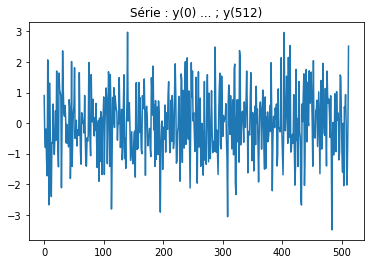

Text(0.5, 1.0, 'Spectre / Calcul sur l intervalle [0 ; 512]')

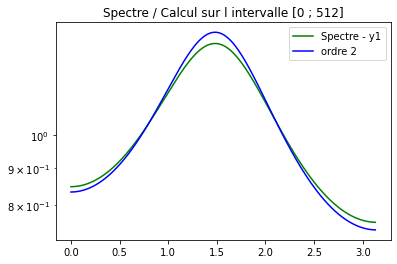

In [59]:
Np = 256
m1=int(n/3) # largeur d une trame d analyse
m2 = 0
y1=np.transpose(np.array([*y[m2:m1],0,0,0]))
y2=np.transpose(np.array([0,*y[m2:m1],0,0]))
y3=np.transpose(np.array([0,0,*y[m2:m1],0]))
y4=np.transpose(np.array([0,0,0,*y[m2:m1]]))

A=np.array([y1,y2,y3,y4])
D=np.cov(A);			#matrice de covariance / d'autocorrélation 5*5


#Calcul des coefficients par Yule-Walker

H=np.dot(-np.linalg.inv(D[0:2,0:2]),np.transpose(D[0,1:3])) #ordre 2

H1=np.transpose([1,*np.transpose(H)]) #vecteur de coefficients incluant a0(ordre 2)


# Tracé des spectres estimés
[h12,w]=freqz(1,H1,Np) # ordre 3
mag2=abs(h12)

f,mag = spectre(a[0],H1)
plt.figure()
plt.plot(y[m2:m1])
plt.title("Série : y(" + str(m2) + ") ... ; y("+ str(m1) + ")"  )
plt.show()
plt.semilogy(
    f,mag[0], 'g',
    f,mag[1],'-b',
)
plt.legend(['Spectre - y1', 'ordre 2'])
plt.title("Spectre / Calcul sur l intervalle ["+ str(m2) + " ; " + str(m1) + ']')

### deuxième série

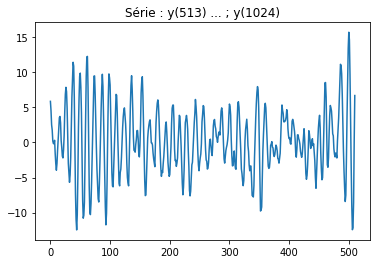

Text(0.5, 1.0, 'Spectre / Calcul sur l intervalle [513 ; 1024]')

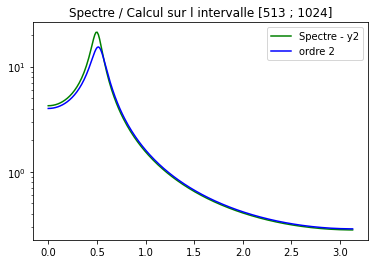

In [60]:
Np = 256
m1=int(n/3)*2 # largeur d une trame d analyse
m2=int(n/3)+1
y1=np.transpose(np.array([*y[m2:m1],0,0,0]))
y2=np.transpose(np.array([0,*y[m2:m1],0,0]))
y3=np.transpose(np.array([0,0,*y[m2:m1],0]))
y4=np.transpose(np.array([0,0,0,*y[m2:m1]]))

A=np.array([y1,y2,y3,y4])
D=np.cov(A);			#matrice de covariance / d'autocorrélation 4*4


#Calcul des coefficients par Yule-Walker

H=np.dot(-np.linalg.inv(D[0:2,0:2]),np.transpose(D[0,1:3])) #ordre 2

H1=np.transpose([1,*np.transpose(H)]) #vecteur de coefficients incluant a0(ordre 2)


# Tracé des spectres estimés
[h12,w]=freqz(1,H1,Np) # ordre 3
mag2=abs(h12)

f,mag = spectre(a[1],H1)
plt.figure()
plt.plot(y[m2:m1])
plt.title("Série : y(" + str(m2) + ") ... ; y("+ str(m1) + ")"  )
plt.show()
plt.semilogy(
    f,mag[0], 'g',
    f,mag[1],'-b',
)
plt.legend(['Spectre - y2', 'ordre 2'])
plt.title("Spectre / Calcul sur l intervalle ["+ str(m2) + " ; " + str(m1) + ']')

### troisème série

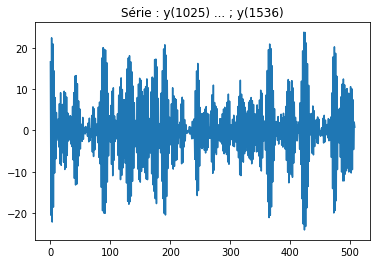

Text(0.5, 1.0, 'Spectre / Calcul sur l intervalle [1025 ; 1536]')

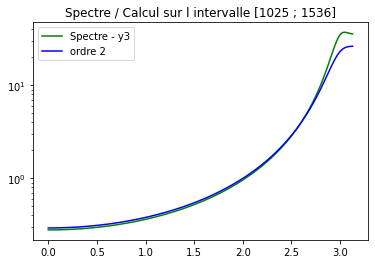

In [57]:
Np = 256
m1=n # largeur d une trame d analyse
m2=int(n/3)*2+1
y1=np.transpose(np.array([*y[m2:m1],0,0,0]))
y2=np.transpose(np.array([0,*y[m2:m1],0,0]))
y3=np.transpose(np.array([0,0,*y[m2:m1],0]))
y4=np.transpose(np.array([0,0,0,*y[m2:m1]]))

A=np.array([y1,y2,y3,y4])
D=np.cov(A);			#matrice de covariance / d'autocorrélation 4*4


#Calcul des coefficients par Yule-Walker

H=np.dot(-np.linalg.inv(D[0:2,0:2]),np.transpose(D[0,1:3])) #ordre 2

H1=np.transpose([1,*np.transpose(H)]) #vecteur de coefficients incluant a0(ordre 2)


# Tracé des spectres estimés
[h12,w]=freqz(1,H1,Np) # ordre 3
mag2=abs(h12)

f,mag = spectre(a[2],H1)
plt.figure()
plt.plot(y[m2:m1])
plt.title("Série : y(" + str(m2) + ") ... ; y("+ str(m1) + ")"  )
plt.show()
plt.semilogy(
    f,mag[0], 'g',
    f,mag[1],'-b',
)
plt.legend(['Spectre - y3', 'ordre 2'])
plt.title("Spectre / Calcul sur l intervalle ["+ str(m2) + " ; " + str(m1) + ']')

# Q5

In [112]:
def lpc(ordre, mat):
    ys=[]
    for i in range(ordre+1):
        ys.append(np.matrix.transpose(np.array([0]*i + mat + [0]*(ordre-i))))

    array = []
    for y in ys:
        array.append(y)
    
    A = np.array(array)

    D = np.cov(A)

    E = np.matmul(-np.linalg.inv(D[0:ordre, 0:ordre]),np.matrix.transpose(D[0,1:ordre+1]))
    E1 = [1, *np.matrix.transpose(E)]

    return E1

def modelisation_theorique(ordre):

    coeffs = lpc(ordre, y)
    yth = np.zeros(len(y))

    for k in range(1,len(y)-len(coeffs)-1):
        
        for j in range(1,len(coeffs)):
            yth[k+len(coeffs)]-=coeffs[j]*yth[k+len(coeffs)-j]

        yth[k+len(coeffs)]+=aleas.gauss(0,1)


    f,mag = spectre(coeffs)

    fig, axs = plt.subplots(3,1,figsize=(10,10))

    ax = axs[0]
    ax.plot(yth)
    ax.set_title("Y théorique à l'ordre "+ str(ordre))
    ax = axs[1]
    ax.semilogy(f,mag[0],'-r')
    ax.set_title("Spectre")
    ax = axs[2]
    ax.plot(np.correlate(yth,yth,"full"), 'y')
    ax.set_title("Autocorrélation")

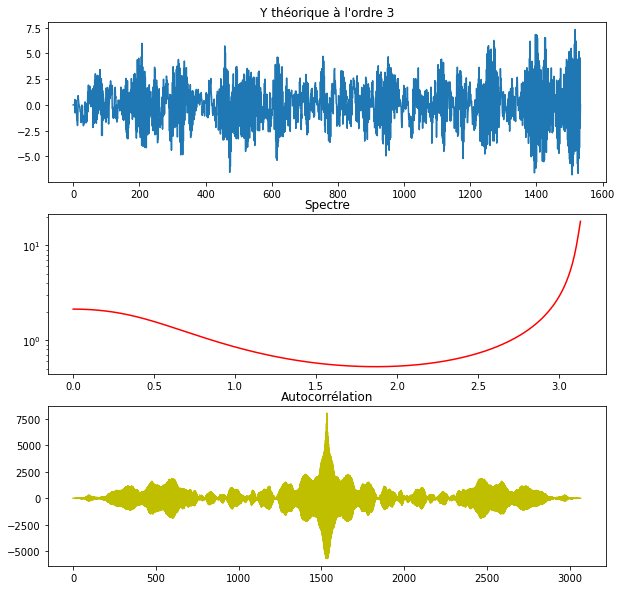

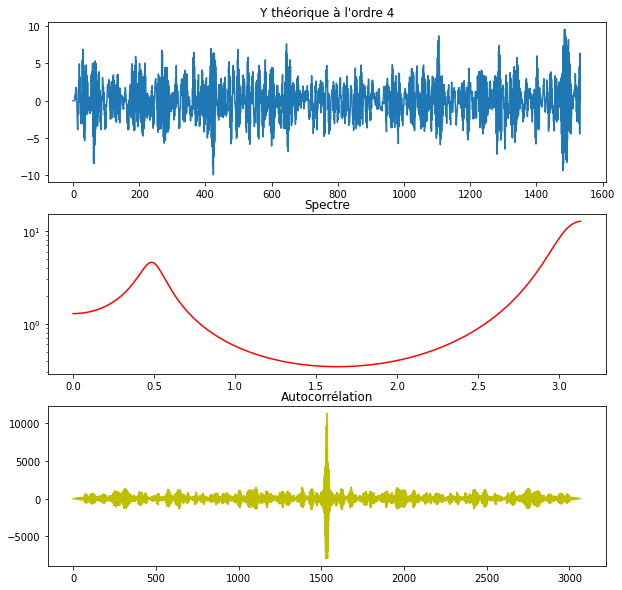

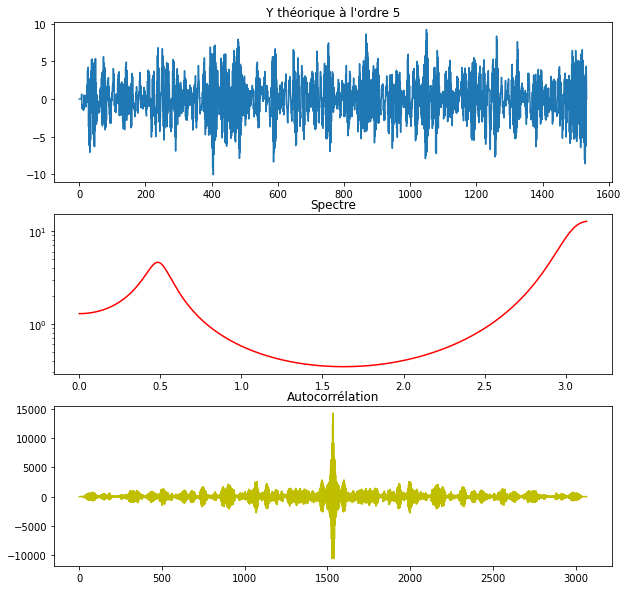

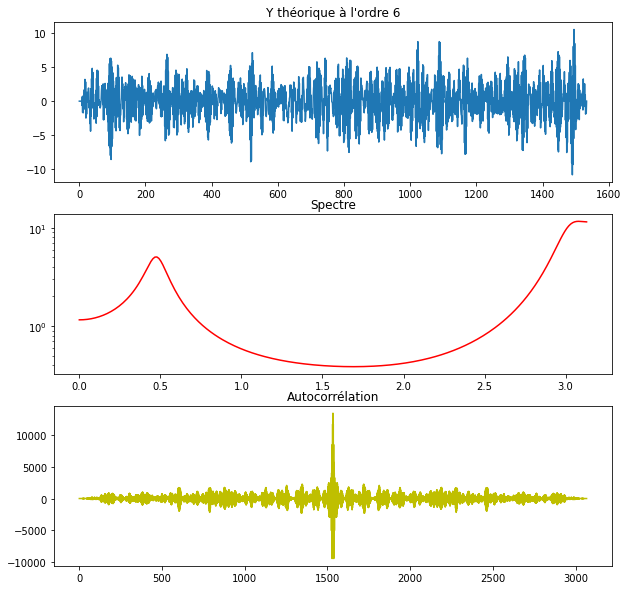

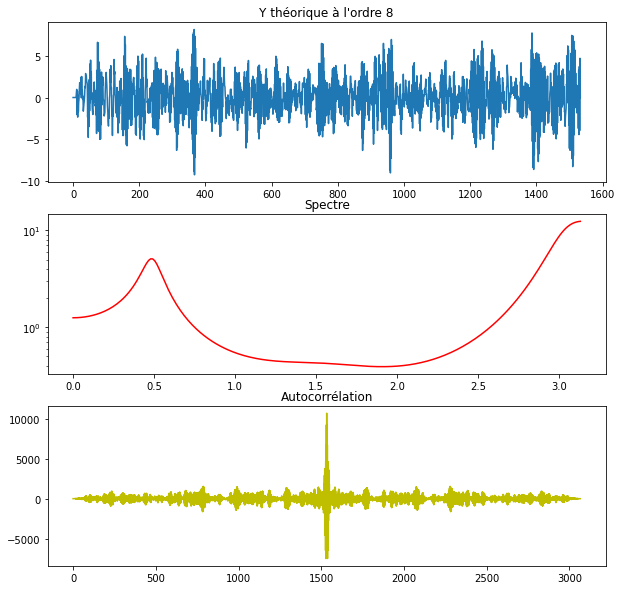

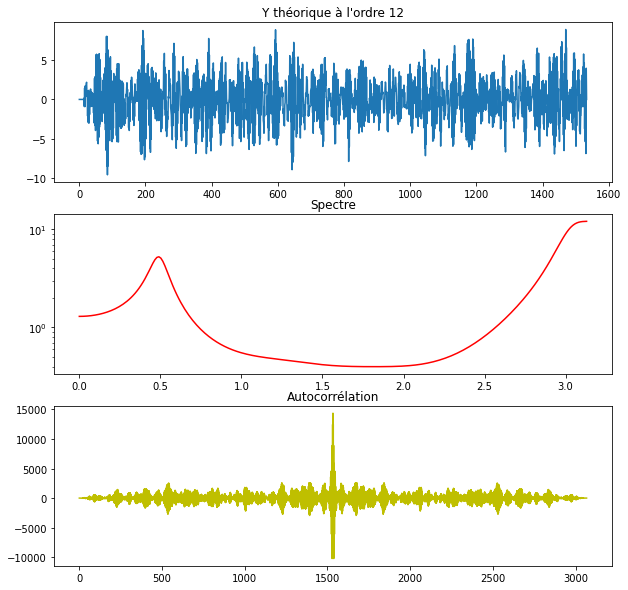

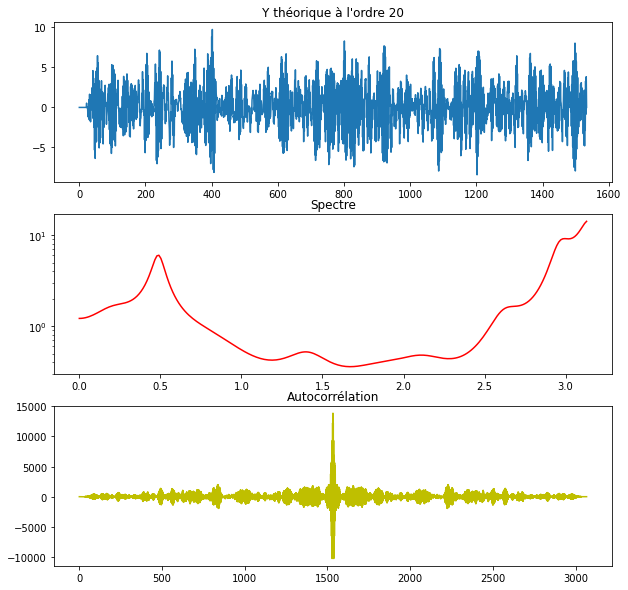

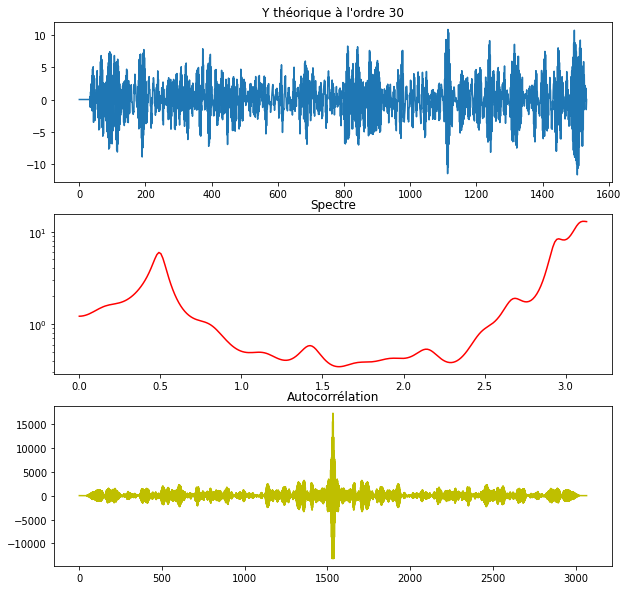

In [113]:
ordre = [3,4,5,6,8,12,20,30]
for i in ordre:
    modelisation_theorique(i)

meme si juxtaposition, a la place de chercher modele global, il vaut mieux considérer différentes découpe de cette serie et effectuer un model par trame


# Q6